# BT4012 Project: Data Preprocessing & Feature Engineering
### Completed by: Group 8

# Import Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Load Datasets & Basic EDA

#### Train set

In [2]:
train_df = pd.read_csv('../data/preliminary/train.csv')
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1072349,2020-03-21 19:05:27,2242542703101233,fraud_Bahringer Group,health_fitness,1.40,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,38.4921,-85.4524,564,Pensions consultant,1996-04-10,5a4c5bc47fd9ca60a9cdbe38423654b4,1363892727,37.965322,-85.661501,0
1,1123019,2020-04-12 21:34:21,4469777115158234880,"fraud_Douglas, Schneider and Turner",shopping_pos,9.73,Gregory,Graham,M,4005 Dana Glens,...,42.7280,-71.1810,47249,Market researcher,1980-11-22,af686a90fb3eff86e0a961d852550619,1365802461,43.044230,-71.136907,0
2,1287799,2020-06-17 16:24:29,4312133045694601139,fraud_Fritsch and Sons,health_fitness,21.84,Julian,Price,M,086 Pierce Cove,...,39.3764,-76.7290,33917,Company secretary,1977-06-12,f70fea505c5a765825aafb72d18c1aa5,1371486269,39.365746,-77.165503,0
3,640815,2019-09-29 19:34:07,30029052116970,fraud_Wiza LLC,misc_pos,8.16,Curtis,Young,M,4319 Watson Shoals Suite 658,...,42.1239,-79.1895,3833,Metallurgist,1970-10-09,61d6b585be9cad4fd36409019b693aaa,1348947247,42.692928,-78.435859,0
4,668880,2019-10-12 14:38:12,3500969075198072,fraud_Predovic Inc,shopping_net,184.55,Kenneth,Sanchez,M,0110 Ashley Forest,...,47.2271,-117.0819,895,Clothing/textile technologist,1999-05-31,e7fc0dc8be81974dacd6fc4c7e3c5362,1350052692,47.861069,-116.983182,0


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             240000 non-null  int64  
 1   trans_date_trans_time  240000 non-null  object 
 2   cc_num                 240000 non-null  int64  
 3   merchant               240000 non-null  object 
 4   category               240000 non-null  object 
 5   amt                    240000 non-null  float64
 6   first                  240000 non-null  object 
 7   last                   240000 non-null  object 
 8   gender                 240000 non-null  object 
 9   street                 240000 non-null  object 
 10  city                   240000 non-null  object 
 11  state                  240000 non-null  object 
 12  zip                    240000 non-null  int64  
 13  lat                    240000 non-null  float64
 14  long                   240000 non-nu

In [4]:
train_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,2.400000e+05,2.400000e+05,240000.000000,240000.000000,240000.000000,240000.000000,2.400000e+05,2.400000e+05,240000.000000,240000.000000,240000.000000
mean,6.461744e+05,4.209063e+17,82.137978,48760.114425,38.545540,-90.204605,8.918851e+04,1.349169e+09,38.544598,-90.204016,0.030550
std,3.751697e+05,1.314206e+18,182.731529,26920.620431,5.069207,13.757986,3.032851e+05,1.287179e+07,5.104405,13.770584,0.172095
min,1.000000e+00,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325376e+09,19.031242,-166.664828,0.000000
25%,3.207442e+05,1.800429e+14,9.840000,26237.000000,34.668900,-96.798000,7.430000e+02,1.338673e+09,34.754159,-96.888902,0.000000
50%,6.455065e+05,3.521417e+15,48.580000,48174.000000,39.371600,-87.461600,2.456000e+03,1.349109e+09,39.375016,-87.430950,0.000000
75%,9.708892e+05,4.651007e+15,86.140000,72011.000000,41.940400,-80.138100,2.032800e+04,1.359301e+09,41.953029,-80.212441,0.000000
max,1.296673e+06,4.992346e+18,15047.030000,99783.000000,66.693300,-67.950300,2.906700e+06,1.371817e+09,67.510267,-66.959178,1.000000


#### Validation set

In [5]:
validation_df = pd.read_csv('../data/preliminary/validation.csv')
validation_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,1032241,2020-03-03 14:32:35,4906628655840914250,fraud_Feil-Morar,health_fitness,283.13,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,24.6557,-81.3824,32891,Town planner,1987-02-13,cad774f9be5e482b8a7eb4bb10c3893d,1362321155,25.512218,-82.292661,0
1,921195,2019-12-30 21:32:22,571365235126,fraud_Jakubowski Group,food_dining,6.57,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,44.5995,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,e1cf7e14ffbb8ac4888982f79147694a,1356903142,44.034668,-85.607445,0
2,869168,2019-12-19 23:13:48,4755696071492,fraud_Erdman-Ebert,personal_care,12.23,Robert,Evans,M,01892 Patricia Vista Apt. 828,...,32.9643,-96.6012,20328,Site engineer,1985-06-20,2729c48fe5eb11ab671aa3341236cebc,1355958828,32.598802,-96.689835,0
3,956492,2020-01-19 14:48:11,370612217861404,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,6.35,Amanda,Fitzgerald,F,298 Kayla Lights,...,40.1159,-74.8536,21125,"Administrator, charities/voluntary organisations",1985-05-25,36d2a37aab561bb9335e82f1df4f96c7,1358606891,39.889060,-75.542567,0
4,263801,2019-05-11 13:45:14,4378993458389626,"fraud_Schneider, Hayes and Nikolaus",food_dining,2.93,Travis,Hayes,M,1561 Chase Grove,...,43.9742,-71.1503,3807,Surgeon,1999-10-25,32a8bdeca822ad81674e544dbddc3ef3,1336743914,43.643013,-70.210856,0


In [6]:
validation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   trans_date_trans_time  30000 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   merchant               30000 non-null  object 
 4   category               30000 non-null  object 
 5   amt                    30000 non-null  float64
 6   first                  30000 non-null  object 
 7   last                   30000 non-null  object 
 8   gender                 30000 non-null  object 
 9   street                 30000 non-null  object 
 10  city                   30000 non-null  object 
 11  state                  30000 non-null  object 
 12  zip                    30000 non-null  int64  
 13  lat                    30000 non-null  float64
 14  long                   30000 non-null  float64
 15  ci

In [7]:
validation_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,6.493316e+05,4.190471e+17,69.693680,48922.285433,38.577930,-90.303841,8.799095e+04,1.349286e+09,38.579220,-90.303098,0.005800
std,3.720990e+05,1.310421e+18,148.140514,26928.110504,5.058415,13.797428,2.977069e+05,1.276236e+07,5.090231,13.813347,0.075938
min,2.300000e+01,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.325377e+09,19.041880,-166.656560,0.000000
25%,3.315445e+05,1.800429e+14,9.590000,26237.000000,34.668900,-96.917700,7.440000e+02,1.339036e+09,34.768844,-96.976487,0.000000
50%,6.481560e+05,3.518759e+15,47.125000,48202.000000,39.401500,-87.591700,2.457000e+03,1.349240e+09,39.414335,-87.496679,0.000000
75%,9.726132e+05,4.642255e+15,82.682500,72042.000000,42.014400,-80.158000,2.032800e+04,1.359392e+09,41.984748,-80.251130,0.000000
max,1.296579e+06,4.992346e+18,9999.390000,99783.000000,65.689900,-67.950300,2.906700e+06,1.371814e+09,66.554249,-66.962913,1.000000


#### Test set

In [8]:
test_df = pd.read_csv('../data/preliminary/test.csv')
test_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,315706,2020-10-19 12:30:31,3566094707272327,"fraud_Hintz, Bauch and Smith",health_fitness,38.09,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,34.3795,-118.5230,34882,Health physicist,1971-04-25,bc12159fcac8af1773fef1d8a1302731,1382185831,34.809923,-118.111582,0
1,151754,2020-08-13 05:57:47,2610529083834453,fraud_Hackett-Lueilwitz,grocery_pos,206.44,Tanya,Dickerson,F,053 Kim Valley Suite 928,...,36.2416,-86.6117,22191,Prison officer,1994-07-27,3b1d9ac4a26f3c56b0cf4cc407250f8d,1376373467,36.644354,-87.480427,0
2,189099,2020-08-26 05:06:42,4873783502705038,fraud_Bahringer-Larson,grocery_net,51.76,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,48.4786,-122.3345,14871,Public house manager,1974-03-10,6975ab8f7f26df75cc6046b07f7ceeb5,1377493602,48.784813,-123.198143,0
3,249823,2020-09-20 18:44:30,5540636818935089,fraud_Jakubowski Group,food_dining,89.38,Kenneth,Foster,M,329 Michael Extension,...,42.6911,-71.1605,76383,Geoscientist,1985-04-04,ee19c9619769485a654364e035b4c01f,1379702670,42.893355,-70.856259,0
4,487280,2020-12-16 13:22:16,213163860545705,"fraud_Lowe, Dietrich and Erdman",kids_pets,41.72,Mark,Tyler,M,82201 Bradley Radial Suite 703,...,33.1410,-82.5150,741,Claims inspector/assessor,1986-04-28,dac5f5438277e192aabd02e93ee6e1a1,1387200136,33.597864,-83.314567,0


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             30000 non-null  int64  
 1   trans_date_trans_time  30000 non-null  object 
 2   cc_num                 30000 non-null  int64  
 3   merchant               30000 non-null  object 
 4   category               30000 non-null  object 
 5   amt                    30000 non-null  float64
 6   first                  30000 non-null  object 
 7   last                   30000 non-null  object 
 8   gender                 30000 non-null  object 
 9   street                 30000 non-null  object 
 10  city                   30000 non-null  object 
 11  state                  30000 non-null  object 
 12  zip                    30000 non-null  int64  
 13  lat                    30000 non-null  float64
 14  long                   30000 non-null  float64
 15  ci

In [10]:
test_df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,30000.00000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,277464.05040,4.207335e+17,68.397767,48772.515967,38.525190,-90.191732,8.723634e+04,1.380664e+09,38.528262,-90.188371,0.003867
std,160266.89681,1.314877e+18,133.799863,26860.632527,5.036476,13.633923,2.932312e+05,5.197068e+06,5.072750,13.647435,0.062063
min,2.00000,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1.371817e+09,19.027422,-166.669812,0.000000
25%,139562.50000,1.800365e+14,9.570000,26237.000000,34.668900,-96.787900,7.430000e+02,1.376049e+09,34.764436,-96.890949,0.000000
50%,275507.00000,3.519607e+15,47.600000,48174.000000,39.371600,-87.461600,2.456000e+03,1.380655e+09,39.395308,-87.423744,0.000000
75%,416561.50000,4.642255e+15,83.152500,72011.000000,41.846700,-80.175200,2.036550e+04,1.385863e+09,41.950251,-80.217881,0.000000
max,555710.00000,4.992346e+18,8517.380000,99783.000000,65.689900,-67.950300,2.906700e+06,1.388534e+09,66.671540,-66.985234,1.000000


# Data Preprocessing

### Steps
- Missing values (train, validation, test)
- Duplicate values (train, validation, test)
- Outliers (train, validation, test)
- Breaking down datetime columns (train, validation, test)
- Removing unnecessary features (train, validation, test)
- Resampling: oversampling fraud/undersampling non-fraud (train)
- Scaling: Standardisation/Normalisation (train, validation, test)
- Encoding (train: fit & transform, validation: transform, test: transform)

### Features
- Unnamed: 0
- trans_date_trans_time: Transaction DateTime
- cc_num: Credit Card Number of Customer
- merchant: Merchant Name
- category: Category of Merchant
- amt: Amount of Transaction
- first: First Name of Credit Card Holder
- last: Last Name of Credit Card Holder
- gender: Gender of Credit Card Holder
- street: Street Address of Credit Card Holder
- city: City of Credit Card Holder
- state: State of Credit Card Holder
- zip: Zip of Credit Card Holder
- lat: Latitude Location of Credit Card Holder
- long: Longitude Location of Credit Card Holder
- city_pop: Credit Card Holder's City Population
- job: Job of Credit Card Holder
- dob: Date of Birth of Credit Card Holder
- trans_num: Transaction Number
- unix_time: UNIX Time of transaction
- merch_lat: Latitude Location of Merchant
- merch_long: Longitude Location of Merchant
- is_fraud: Fraud Flag --> Target Class

Variables to scale: amt, unix_time, city_pop

Variables to encode: merchant, category, gender, city, state

Variables to remove: 'Unnamed: 0', street, zip, trans_num, first, last --> these variables either overlap with other features or are not meaningful features and can lead to model overfitting

Variables to feature engineer rather than preprocess: trans_date_trans_time, dob, lat, long, merch_lat, merch_long, cc_num, job

## Handling Missing Values
In this section, we will look for any missing values in the train, validation, and test sets. If there are missing values, we will handle them by imputation.

#### Train set

In [11]:
# check for null values
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [12]:
# check for na values
train_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Validation set

In [13]:
# check for null values
validation_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [14]:
# check for na values
validation_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

#### Test set

In [15]:
# check for null values
test_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [16]:
# check for na values
test_df.isna().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

As seen from above, there are no missing values in the train, validation, and test sets.

## Handling Duplicates
In this section, we will look for any duplicate rows in the train, validation, and test sets. If there are duplicate rows, we will remove them.

#### Train set

In [17]:
train_df[train_df.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


#### Validation set

In [18]:
validation_df[validation_df.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


#### Test set

In [19]:
test_df[test_df.duplicated()]

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


As seen from above, there are no duplicate rows in the train, validation, and test sets.

## Handling Outliers
In this section, we will look for outliers in the train, validation, and test sets. If there are outliers, we will handle them by imputation, removing, etc.

The following are feature checks that we will do to analyse for outliers:
- check that trans_date_trans_time matches with unix_time
- check that dob makes sense: day is 1-31, month is 1-12, and year is not overly old or recent (can use histograms)
- barplot for category, gender
- boxplot for amt, city_pop
- check that lat, merch_lat are between -90 and 90 inclusive
- check that long, merch_long are between -180 and 180 inclusive

#### Train set

In [20]:
import datetime
import time

# check that trans_date_trans_time matches with unix_time
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'])
train_df['unix_derived'] = train_df['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_train = train_df[train_df['unix_time'] != train_df['unix_derived']]
train_df = train_df.drop(columns=['unix_derived'])
mismatch_train

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,unix_derived
0,1072349,2020-03-21 19:05:27,2242542703101233,fraud_Bahringer Group,health_fitness,1.40,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,-85.4524,564,Pensions consultant,1996-04-10,5a4c5bc47fd9ca60a9cdbe38423654b4,1363892727,37.965322,-85.661501,0,1584788727
1,1123019,2020-04-12 21:34:21,4469777115158234880,"fraud_Douglas, Schneider and Turner",shopping_pos,9.73,Gregory,Graham,M,4005 Dana Glens,...,-71.1810,47249,Market researcher,1980-11-22,af686a90fb3eff86e0a961d852550619,1365802461,43.044230,-71.136907,0,1586698461
2,1287799,2020-06-17 16:24:29,4312133045694601139,fraud_Fritsch and Sons,health_fitness,21.84,Julian,Price,M,086 Pierce Cove,...,-76.7290,33917,Company secretary,1977-06-12,f70fea505c5a765825aafb72d18c1aa5,1371486269,39.365746,-77.165503,0,1592382269
3,640815,2019-09-29 19:34:07,30029052116970,fraud_Wiza LLC,misc_pos,8.16,Curtis,Young,M,4319 Watson Shoals Suite 658,...,-79.1895,3833,Metallurgist,1970-10-09,61d6b585be9cad4fd36409019b693aaa,1348947247,42.692928,-78.435859,0,1569756847
4,668880,2019-10-12 14:38:12,3500969075198072,fraud_Predovic Inc,shopping_net,184.55,Kenneth,Sanchez,M,0110 Ashley Forest,...,-117.0819,895,Clothing/textile technologist,1999-05-31,e7fc0dc8be81974dacd6fc4c7e3c5362,1350052692,47.861069,-116.983182,0,1570862292
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239995,589692,2019-09-07 16:09:20,4079773899158,fraud_Waelchi Inc,kids_pets,12.88,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,-116.4493,129,Cartographer,1965-12-15,5dbc1fa717e840c81823e095d955bbbf,1347034160,44.798352,-116.632527,0,1567843760
239996,314690,2019-06-01 06:52:28,180064817343047,"fraud_Schuppe, Nolan and Hoeger",shopping_pos,1.63,Patricia,Gonzalez,F,8973 Mark Drive,...,-86.5240,344,Chartered public finance accountant,1967-03-30,8eaf8a4778b3e680c65d518543926b06,1338533548,38.157359,-85.857702,0,1559343148
239997,1194213,2020-05-13 20:14:00,30408301059761,fraud_Hilpert-Conroy,kids_pets,40.69,Brandon,Pittman,M,2881 Frey Village,...,-80.1859,4471,Occupational hygienist,1973-10-09,d8b06bc69af2831cbd158ab5ca7bd200,1368476040,33.821302,-81.055067,0,1589372040
239998,1073052,2020-03-22 02:48:25,38057513087029,fraud_Luettgen PLC,gas_transport,47.25,Marissa,Clark,F,2677 Byrd Village Suite 035,...,-121.7913,973849,Geoscientist,1997-01-18,3100d31fbc201be7bdd07faa0ee1d37b,1363920505,38.272782,-122.041386,0,1584816505


In [21]:
# check that dob makes sense: day is 1-31, month is 1-12
train_df['dob'] = pd.to_datetime(train_df['dob'])
train_df['dob_year'] = train_df['dob'].dt.year
train_df['dob_month'] = train_df['dob'].dt.month
train_df['dob_day'] = train_df['dob'].dt.day

wrong_days_train = len(train_df[(train_df['dob_day'] < 1) | (train_df['dob_day'] > 31)])
wrong_months_train = len(train_df[(train_df['dob_month'] < 1) | (train_df['dob_month'] > 12)])
print('Number of incorrect days in train set:', wrong_days_train)
print('Number of incorrect months in train set:', wrong_months_train)

Number of incorrect days in train set: 0
Number of incorrect months in train set: 0


Oldest birth year in train set: 1924
Latest birth year in train set: 2005


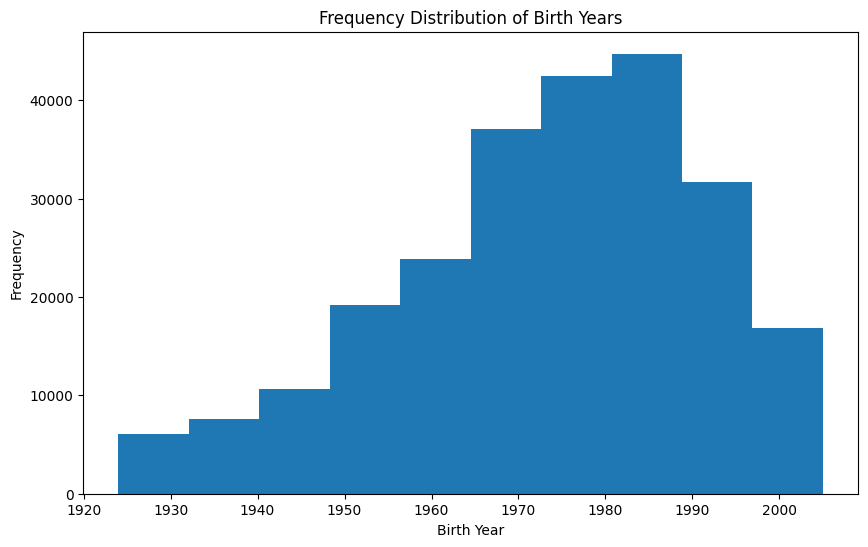

In [22]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_train = train_df['dob_year'].min()
max_dob_year_train = train_df['dob_year'].max()
print('Oldest birth year in train set:', min_dob_year_train)
print('Latest birth year in train set:', max_dob_year_train)

plt.figure(figsize=(10, 6))
plt.hist(train_df['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

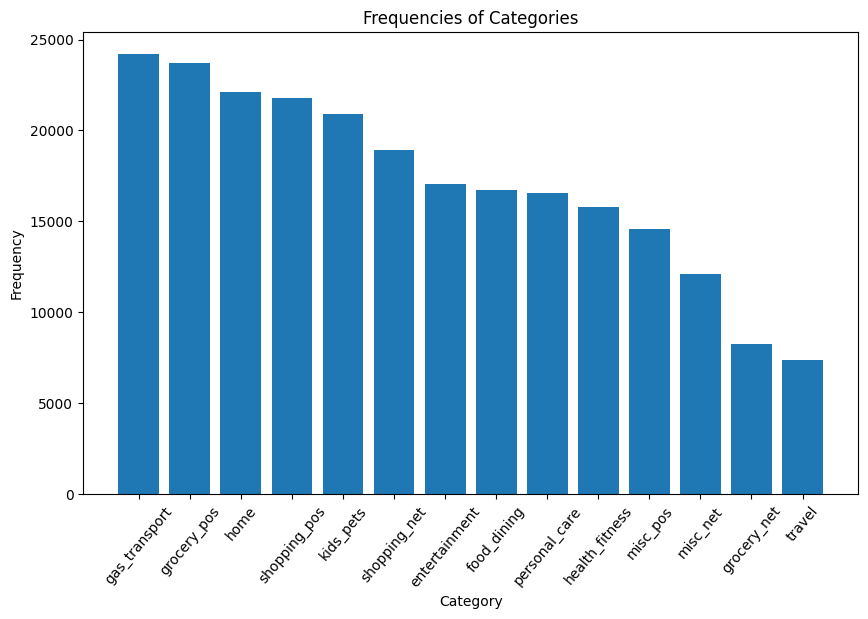

In [23]:
# barplot for category
cat_counts_train = train_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_train.index), cat_counts_train.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

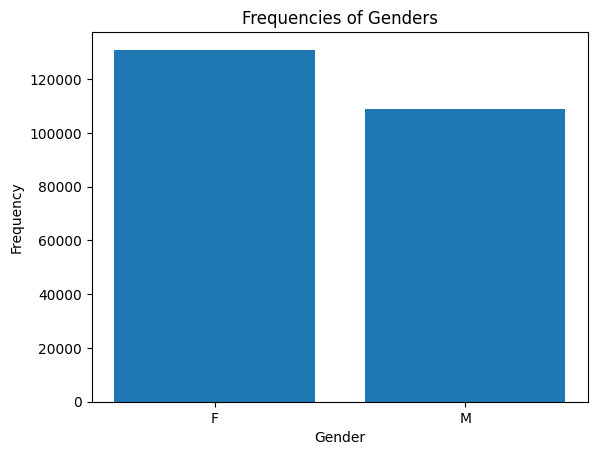

In [24]:
# barplot for gender
gender_counts_train = train_df['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_train.index), gender_counts_train.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

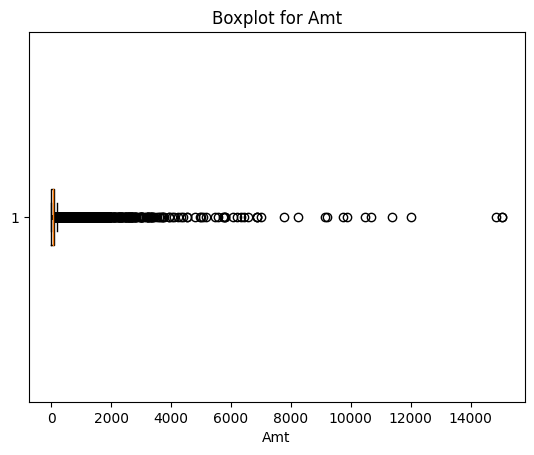

In [25]:
# boxplot for amt
plt.figure()
plt.boxplot(train_df['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

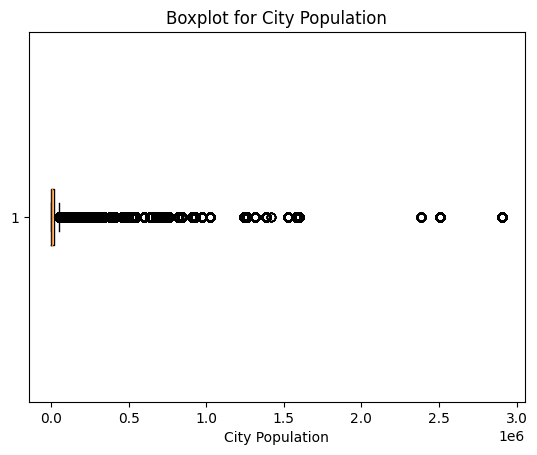

In [26]:
# boxplot for city_pop
plt.figure()
plt.boxplot(train_df['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [27]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in train set:', len(train_df[(train_df['lat'] < -90) | (train_df['lat'] > 90)]))
print('Number of incorrect long in train set:', len(train_df[(train_df['long'] < -180) | (train_df['long'] > 180)]))
print('Number of incorrect merch_lat in train set:', len(train_df[(train_df['merch_lat'] < -90) | (train_df['merch_lat'] > 90)]))
print('Number of incorrect merch_long in train set:', len(train_df[(train_df['merch_long'] < -180) | (train_df['merch_long'] > 180)]))

Number of incorrect lat in train set: 0
Number of incorrect long in train set: 0
Number of incorrect merch_lat in train set: 0
Number of incorrect merch_long in train set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the train set. However, when each value of trans_date_trans_time is converted to its unix timestamp, the derived unix timestamp does not match its corresponding unix_time. Hence, further investigation is needed and we may need to remove the unix_time feature. 

#### Validation set

In [28]:
# check that trans_date_trans_time matches with unix_time
validation_df['trans_date_trans_time'] = pd.to_datetime(validation_df['trans_date_trans_time'])
validation_df['unix_derived'] = validation_df['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_valid = validation_df[validation_df['unix_time'] != validation_df['unix_derived']]
validation_df = validation_df.drop(columns=['unix_derived'])
mismatch_valid

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,unix_derived
0,1032241,2020-03-03 14:32:35,4906628655840914250,fraud_Feil-Morar,health_fitness,283.13,Charles,Moreno,M,838 Franklin Prairie Apt. 902,...,-81.3824,32891,Town planner,1987-02-13,cad774f9be5e482b8a7eb4bb10c3893d,1362321155,25.512218,-82.292661,0,1583217155
1,921195,2019-12-30 21:32:22,571365235126,fraud_Jakubowski Group,food_dining,6.57,Barbara,Taylor,F,0069 Robin Brooks Apt. 695,...,-86.2141,372,"Exhibitions officer, museum/gallery",1995-07-12,e1cf7e14ffbb8ac4888982f79147694a,1356903142,44.034668,-85.607445,0,1577712742
2,869168,2019-12-19 23:13:48,4755696071492,fraud_Erdman-Ebert,personal_care,12.23,Robert,Evans,M,01892 Patricia Vista Apt. 828,...,-96.6012,20328,Site engineer,1985-06-20,2729c48fe5eb11ab671aa3341236cebc,1355958828,32.598802,-96.689835,0,1576768428
3,956492,2020-01-19 14:48:11,370612217861404,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,6.35,Amanda,Fitzgerald,F,298 Kayla Lights,...,-74.8536,21125,"Administrator, charities/voluntary organisations",1985-05-25,36d2a37aab561bb9335e82f1df4f96c7,1358606891,39.889060,-75.542567,0,1579416491
4,263801,2019-05-11 13:45:14,4378993458389626,"fraud_Schneider, Hayes and Nikolaus",food_dining,2.93,Travis,Hayes,M,1561 Chase Grove,...,-71.1503,3807,Surgeon,1999-10-25,32a8bdeca822ad81674e544dbddc3ef3,1336743914,43.643013,-70.210856,0,1557553514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,44712,2019-01-27 16:48:53,377026671291680,"fraud_Mosciski, Ziemann and Farrell",shopping_net,2.63,Jackie,Davis,F,1898 Parker Fork Apt. 057,...,-91.0243,241,Investment analyst,1974-10-27,3d65d2c01f32f52053024069131f8d61,1327682933,36.489105,-91.490362,0,1548578933
29996,1003095,2020-02-16 03:04:59,5501083170975659,"fraud_McCullough, Hudson and Schuster",food_dining,34.38,Wayne,Payne,M,587 Bradley Inlet Suite 281,...,-81.5107,47772,Equities trader,1966-01-04,91f3f097d544a3c55ccdd943d71d800d,1360983899,40.890814,-80.648953,0,1581793499
29997,1041188,2020-03-08 05:22:23,213148039875802,fraud_Miller-Hauck,grocery_pos,180.93,Jill,Jacobs,F,034 Kimberly Mountains,...,-82.2966,79613,Environmental consultant,1978-11-30,89b9ad0cf992735221405d43ea94f612,1362720143,28.457183,-81.521990,0,1583616143
29998,477760,2019-07-28 19:07:55,3535808924394848,fraud_Rolfson-Kunde,personal_care,74.48,Matthew,Myers,M,4936 Michelle Points,...,-88.9597,1532,Radio broadcast assistant,1980-01-09,593bdc0a78787937f830255da11fc6ab,1343502475,40.291688,-89.521832,0,1564312075


In [29]:
# check that dob makes sense: day is 1-31, month is 1-12
validation_df['dob'] = pd.to_datetime(validation_df['dob'])
validation_df['dob_year'] = validation_df['dob'].dt.year
validation_df['dob_month'] = validation_df['dob'].dt.month
validation_df['dob_day'] = validation_df['dob'].dt.day

wrong_days_valid = len(validation_df[(validation_df['dob_day'] < 1) | (validation_df['dob_day'] > 31)])
wrong_months_valid = len(validation_df[(validation_df['dob_month'] < 1) | (validation_df['dob_month'] > 12)])
print('Number of incorrect days in validation set:', wrong_days_valid)
print('Number of incorrect months in validation set:', wrong_months_valid)

Number of incorrect days in validation set: 0
Number of incorrect months in validation set: 0


Oldest birth year in validation set: 1924
Latest birth year in validation set: 2005


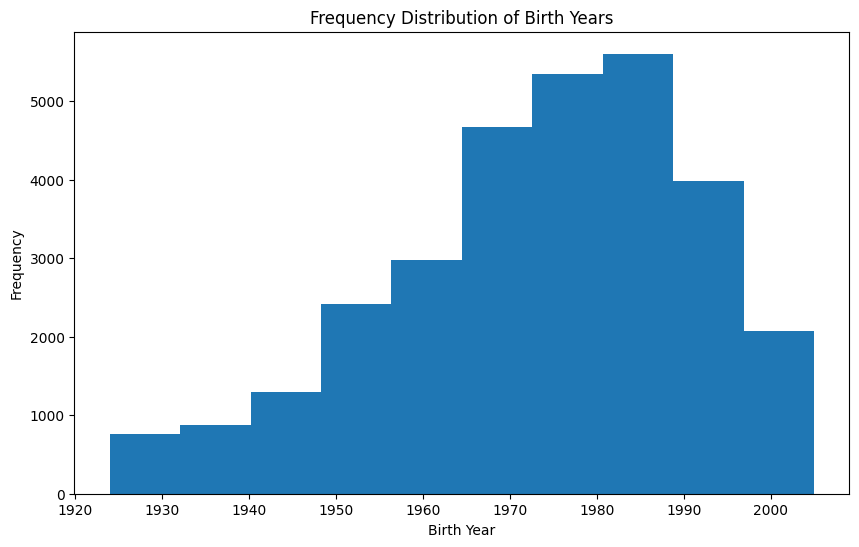

In [30]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_valid = validation_df['dob_year'].min()
max_dob_year_valid = validation_df['dob_year'].max()
print('Oldest birth year in validation set:', min_dob_year_valid)
print('Latest birth year in validation set:', max_dob_year_valid)

plt.figure(figsize=(10, 6))
plt.hist(validation_df['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

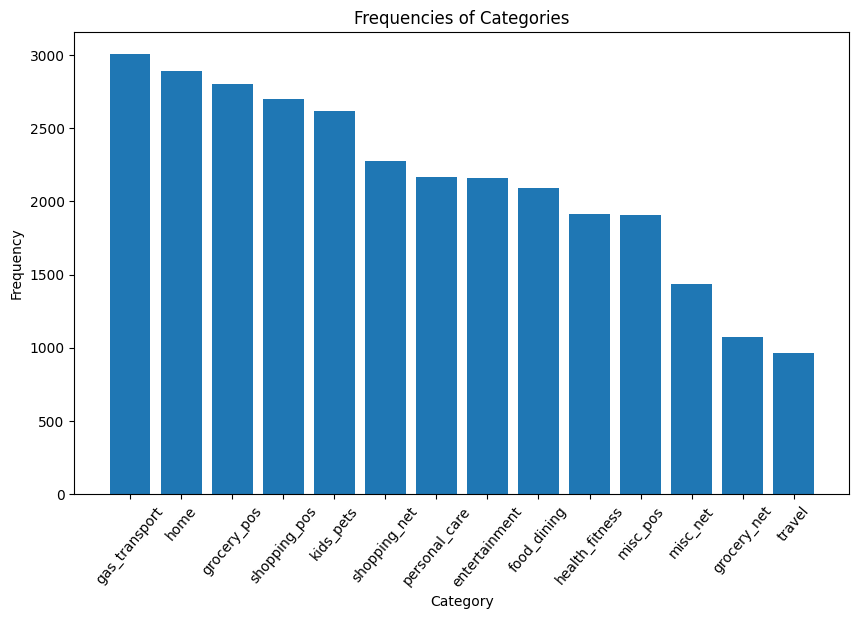

In [31]:
# barplot for category
cat_counts_valid = validation_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_valid.index), cat_counts_valid.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

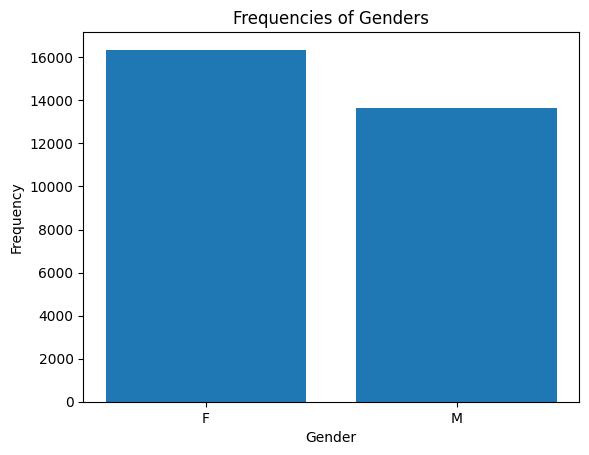

In [32]:
# barplot for gender
gender_counts_valid = validation_df['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_valid.index), gender_counts_valid.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

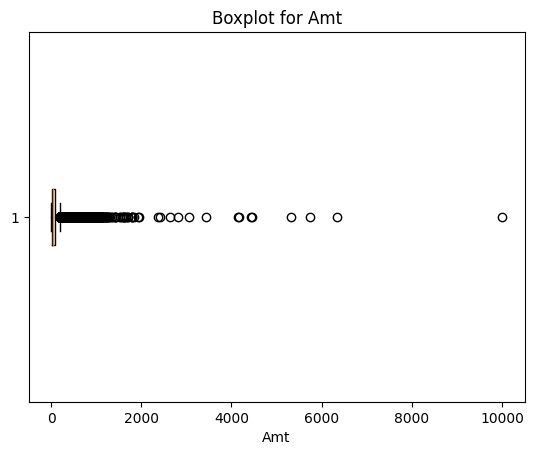

In [33]:
# boxplot for amt
plt.figure()
plt.boxplot(validation_df['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

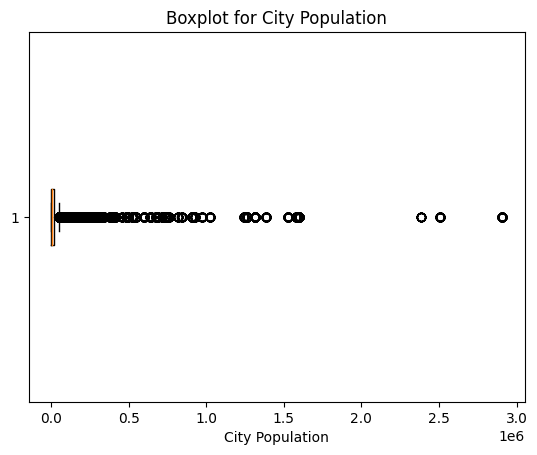

In [34]:
# boxplot for city_pop
plt.figure()
plt.boxplot(validation_df['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [35]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in validation set:', len(validation_df[(validation_df['lat'] < -90) | (validation_df['lat'] > 90)]))
print('Number of incorrect long in validation set:', len(validation_df[(validation_df['long'] < -180) | (validation_df['long'] > 180)]))
print('Number of incorrect merch_lat in validation set:', len(validation_df[(validation_df['merch_lat'] < -90) | (validation_df['merch_lat'] > 90)]))
print('Number of incorrect merch_long in validation set:', len(validation_df[(validation_df['merch_long'] < -180) | (validation_df['merch_long'] > 180)]))

Number of incorrect lat in validation set: 0
Number of incorrect long in validation set: 0
Number of incorrect merch_lat in validation set: 0
Number of incorrect merch_long in validation set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the validation set. However, when each value of trans_date_trans_time is converted to its unix timestamp, the derived unix timestamp does not match its corresponding unix_time. Hence, further investigation is needed and we may need to remove the unix_time feature. 

#### Test set

In [36]:
# check that trans_date_trans_time matches with unix_time
test_df['trans_date_trans_time'] = pd.to_datetime(test_df['trans_date_trans_time'])
test_df['unix_derived'] = test_df['trans_date_trans_time'].apply(lambda x: int(datetime.datetime.timestamp(x)))
mismatch_test = test_df[test_df['unix_time'] != test_df['unix_derived']]
test_df = test_df.drop(columns=['unix_derived'])
mismatch_test

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,unix_derived
0,315706,2020-10-19 12:30:31,3566094707272327,"fraud_Hintz, Bauch and Smith",health_fitness,38.09,Kristina,Stewart,F,47029 Jimmy Tunnel Apt. 106,...,-118.5230,34882,Health physicist,1971-04-25,bc12159fcac8af1773fef1d8a1302731,1382185831,34.809923,-118.111582,0,1603081831
1,151754,2020-08-13 05:57:47,2610529083834453,fraud_Hackett-Lueilwitz,grocery_pos,206.44,Tanya,Dickerson,F,053 Kim Valley Suite 928,...,-86.6117,22191,Prison officer,1994-07-27,3b1d9ac4a26f3c56b0cf4cc407250f8d,1376373467,36.644354,-87.480427,0,1597269467
2,189099,2020-08-26 05:06:42,4873783502705038,fraud_Bahringer-Larson,grocery_net,51.76,Elizabeth,Maxwell,F,194 Goodman Fall Apt. 569,...,-122.3345,14871,Public house manager,1974-03-10,6975ab8f7f26df75cc6046b07f7ceeb5,1377493602,48.784813,-123.198143,0,1598389602
3,249823,2020-09-20 18:44:30,5540636818935089,fraud_Jakubowski Group,food_dining,89.38,Kenneth,Foster,M,329 Michael Extension,...,-71.1605,76383,Geoscientist,1985-04-04,ee19c9619769485a654364e035b4c01f,1379702670,42.893355,-70.856259,0,1600598670
4,487280,2020-12-16 13:22:16,213163860545705,"fraud_Lowe, Dietrich and Erdman",kids_pets,41.72,Mark,Tyler,M,82201 Bradley Radial Suite 703,...,-82.5150,741,Claims inspector/assessor,1986-04-28,dac5f5438277e192aabd02e93ee6e1a1,1387200136,33.597864,-83.314567,0,1608096136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,350245,2020-11-03 08:28:32,630441765090,fraud_Wolf Inc,grocery_pos,130.74,Susan,Washington,F,759 Erin Mount Suite 956,...,-98.9656,1791,Corporate investment banker,1965-07-26,757de9d0a91f68ec1b8c7c44ee2c9710,1383467312,31.893596,-99.869799,0,1604363312
29996,98989,2020-07-26 04:21:58,377234009633447,fraud_Kerluke Inc,misc_net,271.20,Theresa,Blackwell,F,43576 Kristina Islands,...,-77.8229,1925,Systems developer,1966-02-14,5ba97de8a08ecb45821651a3308f02ed,1374812518,40.370968,-77.905729,0,1595708518
29997,453234,2020-12-08 21:06:20,4383521454815,fraud_Little-Gleichner,travel,7.79,John,Robertson,M,209 Austin Stream Apt. 231,...,-86.1633,910148,Academic librarian,1987-09-22,1c7d3b33305252600e8ef0da070d00dd,1386536780,39.985792,-86.364391,0,1607432780
29998,388879,2020-11-20 17:14:58,180058696935600,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,2.96,Richard,Barnes,M,1339 Johnson Landing Suite 007,...,-74.9229,782,Chartered accountant,2000-08-28,a8639ef4a04ad9c85de5926e2cacbf88,1384967698,42.298048,-74.986771,0,1605863698


In [37]:
# check that dob makes sense: day is 1-31, month is 1-12
test_df['dob'] = pd.to_datetime(test_df['dob'])
test_df['dob_year'] = test_df['dob'].dt.year
test_df['dob_month'] = test_df['dob'].dt.month
test_df['dob_day'] = test_df['dob'].dt.day

wrong_days_test = len(test_df[(test_df['dob_day'] < 1) | (test_df['dob_day'] > 31)])
wrong_months_test = len(test_df[(test_df['dob_month'] < 1) | (test_df['dob_month'] > 12)])
print('Number of incorrect days in test set:', wrong_days_test)
print('Number of incorrect months in test set:', wrong_months_test)

Number of incorrect days in test set: 0
Number of incorrect months in test set: 0


Oldest birth year in test set: 1924
Latest birth year in test set: 2005


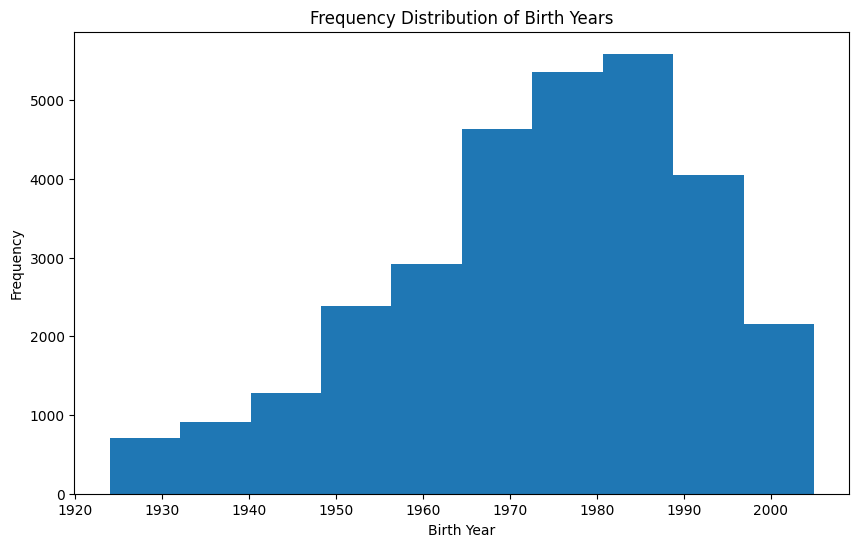

In [38]:
# check that dob makes sense: year is not overly old or recent
min_dob_year_test = test_df['dob_year'].min()
max_dob_year_test = test_df['dob_year'].max()
print('Oldest birth year in test set:', min_dob_year_test)
print('Latest birth year in test set:', max_dob_year_test)

plt.figure(figsize=(10, 6))
plt.hist(test_df['dob_year'])
plt.title('Frequency Distribution of Birth Years')
plt.xlabel('Birth Year')
plt.ylabel('Frequency')
plt.show()

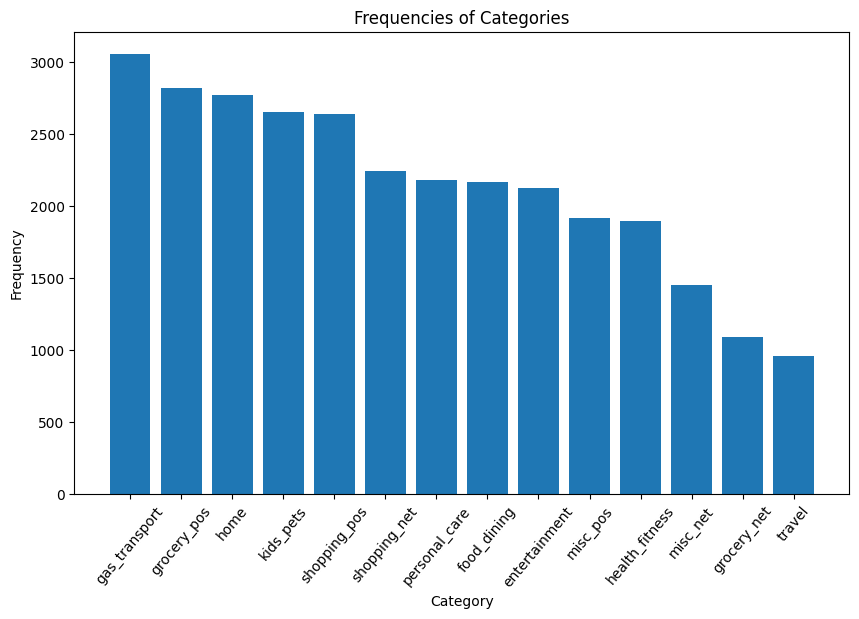

In [39]:
# barplot for category
cat_counts_test = test_df['category'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(list(cat_counts_test.index), cat_counts_test.values)
plt.title('Frequencies of Categories')
plt.xlabel('Category')
plt.xticks(rotation=50)
plt.ylabel('Frequency')
plt.show()

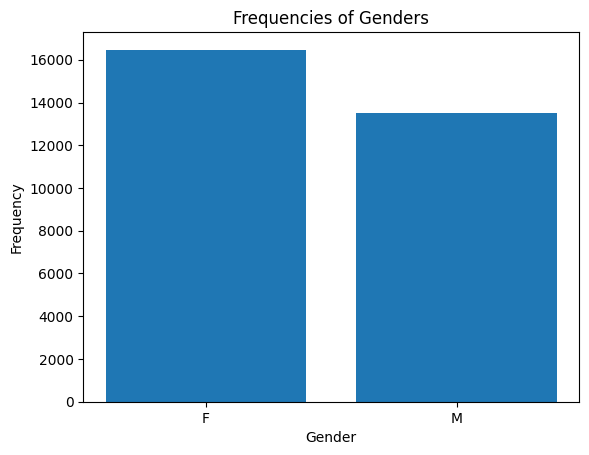

In [40]:
# barplot for gender
gender_counts_test = test_df['gender'].value_counts()

plt.figure()
plt.bar(list(gender_counts_test.index), gender_counts_test.values)
plt.title('Frequencies of Genders')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.show()

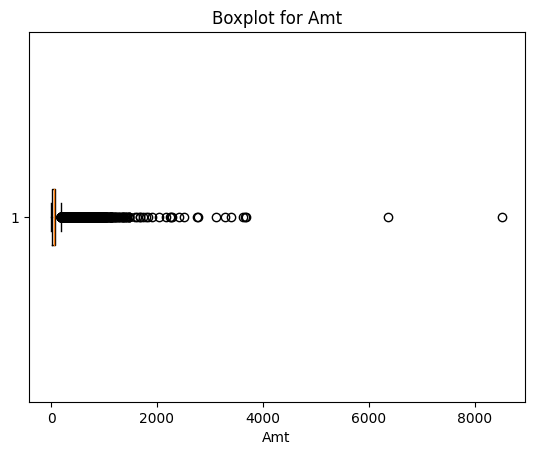

In [41]:
# boxplot for amt
plt.figure()
plt.boxplot(test_df['amt'], vert=False)
plt.title('Boxplot for Amt')
plt.xlabel('Amt')
plt.show()

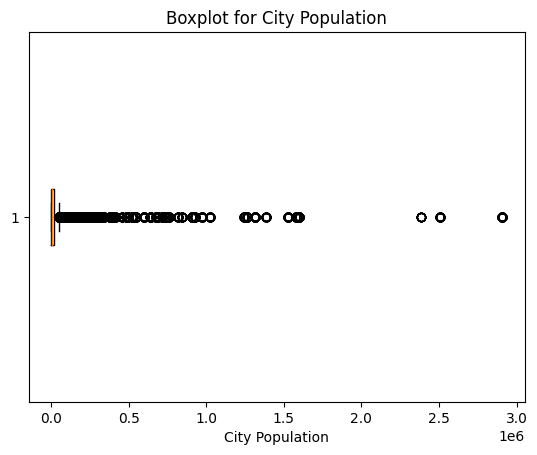

In [42]:
# boxplot for city_pop
plt.figure()
plt.boxplot(test_df['city_pop'], vert=False)
plt.title('Boxplot for City Population')
plt.xlabel('City Population')
plt.show()

In [43]:
# check that lat, merch_lat are between -90 and 90 inclusive
# check that long, merch_long are between -180 and 180 inclusive
print('Number of incorrect lat in test set:', len(test_df[(test_df['lat'] < -90) | (test_df['lat'] > 90)]))
print('Number of incorrect long in test set:', len(test_df[(test_df['long'] < -180) | (test_df['long'] > 180)]))
print('Number of incorrect merch_lat in test set:', len(test_df[(test_df['merch_lat'] < -90) | (test_df['merch_lat'] > 90)]))
print('Number of incorrect merch_long in test set:', len(test_df[(test_df['merch_long'] < -180) | (test_df['merch_long'] > 180)]))

Number of incorrect lat in test set: 0
Number of incorrect long in test set: 0
Number of incorrect merch_lat in test set: 0
Number of incorrect merch_long in test set: 0


From the outlier analysis above, we have decided not to remove any data as outliers from the test set. However, when each value of trans_date_trans_time is converted to its unix timestamp, the derived unix timestamp does not match its corresponding unix_time. Hence, further investigation is needed and we may need to remove the unix_time feature. 

## Breaking Down Datetime Columns
In this section, we will break down the trans_date_trans_time column into 6 columns for the transaction year, month, day, hour, minute, and second.<br>
- These features are more desirable for the machine learning models to learn from as each value is a number. On the other hand, trans_date_trans_time is a datetime type, which is harder for the models to learn from and can lead to model overfitting
 
NOTE: The 'dob' column is already broken down in the outlier analysis section above

#### Train set

In [44]:
# break down trans_date_trans_time column and then remove it, also remove dob
train_df['trans_year'] = train_df['trans_date_trans_time'].dt.year
train_df['trans_month'] = train_df['trans_date_trans_time'].dt.month
train_df['trans_day'] = train_df['trans_date_trans_time'].dt.day
train_df['trans_hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['trans_min'] = train_df['trans_date_trans_time'].dt.minute
train_df['trans_sec'] = train_df['trans_date_trans_time'].dt.second

# train_df = train_df.drop(columns=['trans_date_trans_time', 'dob'])

#### Validation set

In [45]:
# break down trans_date_trans_time column and then remove it, also remove dob
validation_df['trans_year'] = validation_df['trans_date_trans_time'].dt.year
validation_df['trans_month'] = validation_df['trans_date_trans_time'].dt.month
validation_df['trans_day'] = validation_df['trans_date_trans_time'].dt.day
validation_df['trans_hour'] = validation_df['trans_date_trans_time'].dt.hour
validation_df['trans_min'] = validation_df['trans_date_trans_time'].dt.minute
validation_df['trans_sec'] = validation_df['trans_date_trans_time'].dt.second

# validation_df = validation_df.drop(columns=['trans_date_trans_time', 'dob'])

#### Test set

In [46]:
# break down trans_date_trans_time column and then remove it, also remove dob
test_df['trans_year'] = test_df['trans_date_trans_time'].dt.year
test_df['trans_month'] = test_df['trans_date_trans_time'].dt.month
test_df['trans_day'] = test_df['trans_date_trans_time'].dt.day
test_df['trans_hour'] = test_df['trans_date_trans_time'].dt.hour
test_df['trans_min'] = test_df['trans_date_trans_time'].dt.minute
test_df['trans_sec'] = test_df['trans_date_trans_time'].dt.second

# test_df = test_df.drop(columns=['trans_date_trans_time', 'dob'])

## Removing Unnecessary Features
In this section, we will remove certain variables from the train, validation, and test sets. These variables are removed as they either overlap with other features or are not meaningful features and can lead to model overfitting.<br> 
Variables to remove: 'Unnamed: 0', street, zip, trans_num, first, last

#### Train set

In [47]:
train_df = train_df.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

#### Validation set

In [48]:
validation_df = validation_df.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

#### Test set

In [49]:
test_df = test_df.drop(columns=['Unnamed: 0', 'street', 'zip', 'trans_num', 'first', 'last'])

## Resampling
In this section, we will resample the train set to handle its class imbalance. Specifically, we will do hybrid resampling where we will first oversample then undersample.

In [50]:
# split train set into X and y, and get initial class counts
y = train_df.pop('is_fraud')
X = train_df

print('Initial is_fraud class counts')
y.value_counts()

Initial is_fraud class counts


is_fraud
0    232668
1      7332
Name: count, dtype: int64

#### Oversampling (RandomOverSampler)

In [51]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42, sampling_strategy=0.5)
X_res_over, y_res_over = ros.fit_resample(X, y)

In [52]:
print('Oversampled is_fraud class counts')
y_res_over.value_counts()

Oversampled is_fraud class counts


is_fraud
0    232668
1    116334
Name: count, dtype: int64

In [53]:
# from imblearn.over_sampling import SMOTENC

# sm = SMOTENC(categorical_features=['merchant', 'category', 'first', 'last', 'gender', 'city', 'state', 'job', 'trans_num'], random_state=42, sampling_strategy=0.5)
# X_res_smote, y_res_smote = sm.fit_resample(X, y)

In [54]:
# print('Oversampled is_fraud class counts')
# y_res_smote.value_counts()

#### Undersampling (RandomUnderSampler)

In [55]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, sampling_strategy=1)
X_res_under, y_res_under = rus.fit_resample(X_res_over, y_res_over)

In [56]:
print('Undersampled is_fraud class counts')
y_res_under.value_counts()

Undersampled is_fraud class counts


is_fraud
0    116334
1    116334
Name: count, dtype: int64

In [57]:
# from imblearn.under_sampling import NearMiss

# nm = NearMiss(sampling_strategy=1)
# X_res_nm, y_res_nm = nm.fit_resample(X_res_over, y_res_over)

In [58]:
# print('Undersampled is_fraud class counts')
# y_res_nm.value_counts()

#### Creating dataframe for resampled train set

In [59]:
X_res_under['is_fraud'] = y_res_under
train_df = X_res_under
train_df = train_df.reset_index(drop=True)
train_df

,trans_date_trans_time,cc_num,merchant,category,amt,gender,city,state,lat,long,...,dob_year,dob_month,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,is_fraud
0,2020-02-17 23:50:04,4861310130652566408,fraud_Auer-West,shopping_net,1.17,F,Saint Amant,LA,30.2385,-90.8435,...,1977,12,16,2020,2,17,23,50,4,0
1,2019-08-09 15:28:35,3501509250702469,"fraud_Ruecker, Beer and Collier",shopping_net,8.65,M,Naples,FL,26.1184,-81.7361,...,1979,1,2,2019,8,9,15,28,35,0
2,2019-06-05 16:03:25,3506042666828517,fraud_Hilpert-Conroy,kids_pets,10.50,F,Comfort,WV,38.1372,-81.5962,...,1959,7,30,2019,6,5,16,3,25,0
3,2019-11-06 10:51:19,5388659976630693,"fraud_Stroman, Hudson and Erdman",gas_transport,81.59,M,Seneca,WI,43.2064,-90.9405,...,1962,2,14,2019,11,6,10,51,19,0
4,2019-08-11 08:18:23,180048185037117,fraud_Murray-Smitham,grocery_pos,211.87,F,Plainfield,NJ,40.6152,-74.4150,...,1974,7,19,2019,8,11,8,18,23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,2019-03-08 03:35:01,30501624614310,fraud_Shields Inc,grocery_net,6.68,F,Scotia,SC,32.6786,-81.2455,...,1973,5,4,2019,3,8,3,35,1,1
232664,2019-09-01 03:12:15,676308307625,fraud_Kris-Weimann,misc_net,850.18,M,Washoe Valley,NV,39.2669,-119.8174,...,1989,12,10,2019,9,1,3,12,15,1
232665,2020-03-12 18:21:41,4855488158131690372,fraud_Vandervort-Funk,grocery_pos,286.51,M,Graniteville,VT,44.1554,-72.4847,...,1993,9,29,2020,3,12,18,21,41,1
232666,2019-01-19 23:57:40,3541554378551366,fraud_Medhurst PLC,shopping_net,1134.36,F,Hampton,VA,37.0462,-76.4096,...,1939,9,19,2019,1,19,23,57,40,1


## Scaling
In this section, we will scale certain features in the train, validation, and test sets.<br>
Variables to scale: amt, unix_time, city_pop

#### Train set

In [60]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# filter for numerical features and scale them
scaled_train = train_df[['amt', 'unix_time', 'city_pop']]
scaled_train = scaler.fit_transform(scaled_train)
scaled_train_df = pd.DataFrame(scaled_train, columns=['amt', 'unix_time', 'city_pop'])

In [61]:
# replace columns in train_df with the corresponding scaled columns in scaled_train_df
train_df = train_df.drop(columns=['amt', 'unix_time', 'city_pop'])
train_df = train_df.join(scaled_train_df, how='inner')
train_df

,trans_date_trans_time,cc_num,merchant,category,gender,city,state,lat,long,job,...,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,is_fraud,amt,unix_time,city_pop
0,2020-02-17 23:50:04,4861310130652566408,fraud_Auer-West,shopping_net,F,Saint Amant,LA,30.2385,-90.8435,"Surveyor, rural practice",...,2020,2,17,23,50,4,0,0.000011,0.770206,0.003459
1,2019-08-09 15:28:35,3501509250702469,"fraud_Ruecker, Beer and Collier",shopping_net,M,Naples,FL,26.1184,-81.7361,"Programme researcher, broadcasting/film/video",...,2019,8,9,15,28,35,0,0.000508,0.412355,0.094947
2,2019-06-05 16:03:25,3506042666828517,fraud_Hilpert-Conroy,kids_pets,F,Comfort,WV,38.1372,-81.5962,Fine artist,...,2019,6,5,16,3,25,0,0.000631,0.291471,0.000209
3,2019-11-06 10:51:19,5388659976630693,"fraud_Stroman, Hudson and Erdman",gas_transport,M,Seneca,WI,43.2064,-90.9405,Quantity surveyor,...,2019,11,6,10,51,19,0,0.005356,0.577575,0.000045
4,2019-08-11 08:18:23,180048185037117,fraud_Murray-Smitham,grocery_pos,F,Plainfield,NJ,40.6152,-74.4150,Leisure centre manager,...,2019,8,11,8,18,23,0,0.014015,0.415520,0.024585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,2019-03-08 03:35:01,30501624614310,fraud_Shields Inc,grocery_net,F,Scotia,SC,32.6786,-81.2455,Magazine features editor,...,2019,3,8,3,35,1,1,0.000378,0.124926,0.000096
232664,2019-09-01 03:12:15,676308307625,fraud_Kris-Weimann,misc_net,M,Washoe Valley,NV,39.2669,-119.8174,Animal nutritionist,...,2019,9,1,3,12,15,1,0.056439,0.454193,0.001468
232665,2020-03-12 18:21:41,4855488158131690372,fraud_Vandervort-Funk,grocery_pos,M,Graniteville,VT,44.1554,-72.4847,Agricultural consultant,...,2020,3,12,18,21,41,1,0.018976,0.812572,0.000326
232666,2019-01-19 23:57:40,3541554378551366,fraud_Medhurst PLC,shopping_net,F,Hampton,VA,37.0462,-76.4096,Accounting technician,...,2019,1,19,23,57,40,1,0.075326,0.035344,0.047089


#### Validation set

In [62]:
# filter for numerical features and scale them
scaled_valid = validation_df[['amt', 'unix_time', 'city_pop']]
scaled_valid = scaler.transform(scaled_valid)
scaled_valid_df = pd.DataFrame(scaled_valid, columns=['amt', 'unix_time', 'city_pop'])

In [63]:
# replace columns in validation_df with the corresponding scaled columns in scaled_valid_df
validation_df = validation_df.drop(columns=['amt', 'unix_time', 'city_pop'])
validation_df = validation_df.join(scaled_valid_df, how='inner')
validation_df

,trans_date_trans_time,cc_num,merchant,category,gender,city,state,lat,long,job,...,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,amt,unix_time,city_pop
0,2020-03-03 14:32:35,4906628655840914250,fraud_Feil-Morar,health_fitness,M,Key West,FL,24.6557,-81.3824,Town planner,...,13,2020,3,3,14,32,35,0.018751,0.795532,0.011308
1,2019-12-30 21:32:22,571365235126,fraud_Jakubowski Group,food_dining,F,Elberta,MI,44.5995,-86.2141,"Exhibitions officer, museum/gallery",...,12,2019,12,30,21,32,22,0.000370,0.678867,0.000120
2,2019-12-19 23:13:48,4755696071492,fraud_Erdman-Ebert,personal_care,M,Sachse,TX,32.9643,-96.6012,Site engineer,...,20,2019,12,19,23,13,48,0.000746,0.658533,0.006986
3,2020-01-19 14:48:11,370612217861404,"fraud_Greenholt, O'Hara and Balistreri",shopping_net,F,Bristol,PA,40.1159,-74.8536,"Administrator, charities/voluntary organisations",...,25,2020,1,19,14,48,11,0.000356,0.715553,0.007260
4,2019-05-11 13:45:14,4378993458389626,"fraud_Schneider, Hayes and Nikolaus",food_dining,M,Conway,NH,43.9742,-71.1503,Surgeon,...,25,2019,5,11,13,45,14,0.000128,0.244782,0.001302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2019-01-27 16:48:53,377026671291680,"fraud_Mosciski, Ziemann and Farrell",shopping_net,F,Redford,MO,37.3272,-91.0243,Investment analyst,...,27,2019,1,27,16,48,53,0.000108,0.049674,0.000075
29996,2020-02-16 03:04:59,5501083170975659,"fraud_McCullough, Hudson and Schuster",food_dining,M,Cuyahoga Falls,OH,41.1464,-81.5107,Equities trader,...,4,2020,2,16,3,4,59,0.002219,0.766737,0.016427
29997,2020-03-08 05:22:23,213148039875802,fraud_Miller-Hauck,grocery_pos,F,Brandon,FL,27.9551,-82.2966,Environmental consultant,...,30,2020,3,8,5,22,23,0.011959,0.804123,0.027382
29998,2019-07-28 19:07:55,3535808924394848,fraud_Rolfson-Kunde,personal_care,M,Tower Hill,IL,39.3900,-88.9597,Radio broadcast assistant,...,9,2019,7,28,19,7,55,0.004884,0.390313,0.000519


#### Test set

In [64]:
# filter for numerical features and scale them
scaled_test = test_df[['amt', 'unix_time', 'city_pop']]
scaled_test = scaler.transform(scaled_test)
scaled_test_df = pd.DataFrame(scaled_test, columns=['amt', 'unix_time', 'city_pop'])

In [65]:
# replace columns in test_df with the corresponding scaled columns in scaled_test_df
test_df = test_df.drop(columns=['amt', 'unix_time', 'city_pop'])
test_df = test_df.join(scaled_test_df, how='inner')
test_df

,trans_date_trans_time,cc_num,merchant,category,gender,city,state,lat,long,job,...,dob_day,trans_year,trans_month,trans_day,trans_hour,trans_min,trans_sec,amt,unix_time,city_pop
0,2020-10-19 12:30:31,3566094707272327,"fraud_Hintz, Bauch and Smith",health_fitness,F,Newhall,CA,34.3795,-118.5230,Health physicist,...,25,2020,10,19,12,30,31,0.002465,1.223274,0.011993
1,2020-08-13 05:57:47,2610529083834453,fraud_Hackett-Lueilwitz,grocery_pos,F,Old Hickory,TN,36.2416,-86.6117,Prison officer,...,27,2020,8,13,5,57,47,0.013654,1.098117,0.007627
2,2020-08-26 05:06:42,4873783502705038,fraud_Bahringer-Larson,grocery_net,F,Burlington,WA,48.4786,-122.3345,Public house manager,...,10,2020,8,26,5,6,42,0.003374,1.122237,0.005108
3,2020-09-20 18:44:30,5540636818935089,fraud_Jakubowski Group,food_dining,M,Lawrence,MA,42.6911,-71.1605,Geoscientist,...,4,2020,9,20,18,44,30,0.005874,1.169805,0.026271
4,2020-12-16 13:22:16,213163860545705,"fraud_Lowe, Dietrich and Erdman",kids_pets,M,Avera,GA,33.1410,-82.5150,Claims inspector/assessor,...,28,2020,12,16,13,22,16,0.002706,1.331246,0.000247
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,2020-11-03 08:28:32,630441765090,fraud_Wolf Inc,grocery_pos,F,May,TX,31.9571,-98.9656,Corporate investment banker,...,26,2020,11,3,8,28,32,0.008623,1.250868,0.000608
29996,2020-07-26 04:21:58,377234009633447,fraud_Kerluke Inc,misc_net,F,Shenandoah Junction,WV,39.3716,-77.8229,Systems developer,...,14,2020,7,26,4,21,58,0.017958,1.064506,0.000654
29997,2020-12-08 21:06:20,4383521454815,fraud_Little-Gleichner,travel,M,Indianapolis,IN,39.9347,-86.1633,Academic librarian,...,22,2020,12,8,21,6,20,0.000451,1.316962,0.313115
29998,2020-11-20 17:14:58,180058696935600,"fraud_Klocko, Runolfsdottir and Breitenberg",health_fitness,M,De Lancey,NY,42.1890,-74.9229,Chartered accountant,...,28,2020,11,20,17,14,58,0.000130,1.283175,0.000261


## Encoding
In this section, we will apply encoding on the train, validation, and test sets.<br>
Variables to encode: merchant, category, gender, city, state

#### Train set

In [66]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown='ignore')

# filter for categorical features and one-hot encode them
encoded_train = train_df[['merchant', 'category', 'gender', 'city', 'state']]
encoded_train = enc.fit_transform(encoded_train)
encoded_train_array = encoded_train.toarray()
encoded_train_df = pd.DataFrame(encoded_train_array, columns=enc.get_feature_names_out())
encoded_train_df

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
232665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
232666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [67]:
import scipy

# join encoded_train_df with the remaining train_df
remaining_train_df = train_df[train_df.columns.difference(['merchant', 'category', 'gender', 'city', 'state'])]
target_col_train = remaining_train_df.pop('is_fraud')
remaining_train_df['is_fraud'] = target_col_train

# remaining_train_sparse = scipy.sparse.csr_matrix(remaining_train_df.values)
# train_df1 = scipy.sparse.hstack([encoded_train, remaining_train_sparse])
train_df1 = encoded_train_df.join(remaining_train_df, how='inner')
train_df1

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,merch_long,trans_date_trans_time,trans_day,trans_hour,trans_min,trans_month,trans_sec,trans_year,unix_time,is_fraud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-90.617086,2020-02-17 23:50:04,17,23,50,2,4,2020,0.770206,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-81.564535,2019-08-09 15:28:35,9,15,28,8,35,2019,0.412355,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-81.619032,2019-06-05 16:03:25,5,16,3,6,25,2019,0.291471,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-91.763561,2019-11-06 10:51:19,6,10,51,11,19,2019,0.577575,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.132404,2019-08-11 08:18:23,11,8,18,8,23,2019,0.415520,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-81.743136,2019-03-08 03:35:01,8,3,35,3,1,2019,0.124926,1
232664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-118.927284,2019-09-01 03:12:15,1,3,12,9,15,2019,0.454193,1
232665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-73.339106,2020-03-12 18:21:41,12,18,21,3,41,2020,0.812572,1
232666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-76.974768,2019-01-19 23:57:40,19,23,57,1,40,2019,0.035344,1


#### Validation set

In [68]:
# filter for categorical features and one-hot encode them
encoded_valid = validation_df[['merchant', 'category', 'gender', 'city', 'state']]
encoded_valid = enc.transform(encoded_valid)
encoded_valid_array = encoded_valid.toarray()
encoded_valid_df = pd.DataFrame(encoded_valid_array, columns=enc.get_feature_names_out())
encoded_valid_df

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [69]:
# join encoded_valid_df with the remaining validation_df
remaining_valid_df = validation_df[validation_df.columns.difference(['merchant', 'category', 'gender', 'city', 'state'])]
target_col_valid = remaining_valid_df.pop('is_fraud')
remaining_valid_df['is_fraud'] = target_col_valid

# remaining_valid_sparse = scipy.sparse.csr_matrix(remaining_valid_df.values)
# validation_df1 = scipy.sparse.hstack([encoded_valid, remaining_valid_sparse])
validation_df1 = encoded_valid_df.join(remaining_valid_df, how='inner')
validation_df1

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,merch_long,trans_date_trans_time,trans_day,trans_hour,trans_min,trans_month,trans_sec,trans_year,unix_time,is_fraud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-82.292661,2020-03-03 14:32:35,3,14,32,3,35,2020,0.795532,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-85.607445,2019-12-30 21:32:22,30,21,32,12,22,2019,0.678867,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-96.689835,2019-12-19 23:13:48,19,23,13,12,48,2019,0.658533,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-75.542567,2020-01-19 14:48:11,19,14,48,1,11,2020,0.715553,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-70.210856,2019-05-11 13:45:14,11,13,45,5,14,2019,0.244782,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-91.490362,2019-01-27 16:48:53,27,16,48,1,53,2019,0.049674,0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-80.648953,2020-02-16 03:04:59,16,3,4,2,59,2020,0.766737,0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-81.521990,2020-03-08 05:22:23,8,5,22,3,23,2020,0.804123,0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-89.521832,2019-07-28 19:07:55,28,19,7,7,55,2019,0.390313,0


#### Test set

In [70]:
# filter for categorical features and one-hot encode them
encoded_test = test_df[['merchant', 'category', 'gender', 'city', 'state']]
encoded_test = enc.transform(encoded_test)
encoded_test_array = encoded_test.toarray()
encoded_test_df = pd.DataFrame(encoded_test_array, columns=enc.get_feature_names_out())
encoded_test_df

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [71]:
# join encoded_test_df with the remaining test_df
remaining_test_df = test_df[test_df.columns.difference(['merchant', 'category', 'gender', 'city', 'state'])]
target_col_test = remaining_test_df.pop('is_fraud')
remaining_test_df['is_fraud'] = target_col_test

# remaining_test_sparse = scipy.sparse.csr_matrix(remaining_test_df.values)
# test_df1 = scipy.sparse.hstack([encoded_test, remaining_test_sparse])
test_df1 = encoded_test_df.join(remaining_test_df, how='inner')
test_df1

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,merch_long,trans_date_trans_time,trans_day,trans_hour,trans_min,trans_month,trans_sec,trans_year,unix_time,is_fraud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-118.111582,2020-10-19 12:30:31,19,12,30,10,31,2020,1.223274,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-87.480427,2020-08-13 05:57:47,13,5,57,8,47,2020,1.098117,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-123.198143,2020-08-26 05:06:42,26,5,6,8,42,2020,1.122237,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-70.856259,2020-09-20 18:44:30,20,18,44,9,30,2020,1.169805,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-83.314567,2020-12-16 13:22:16,16,13,22,12,16,2020,1.331246,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-99.869799,2020-11-03 08:28:32,3,8,28,11,32,2020,1.250868,0
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-77.905729,2020-07-26 04:21:58,26,4,21,7,58,2020,1.064506,0
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-86.364391,2020-12-08 21:06:20,8,21,6,12,20,2020,1.316962,0
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-74.986771,2020-11-20 17:14:58,20,17,14,11,58,2020,1.283175,0


In [72]:
# split train df, validation df, test df into each of their X and y
y_train = train_df1.pop('is_fraud')
X_train = train_df1

y_valid = validation_df1.pop('is_fraud')
X_valid = validation_df1

y_test = test_df1.pop('is_fraud')
X_test = test_df1

# Feature Engineering

### Features to engineer
- trans_date_trans_time
    - break each value up into year, month, day, hour, min, sec columns (completed above)
    - seasonality and holiday indicators
- dob
    - break each value up into year, month, day columns (completed above)
    - create age column: calculate it from current datetime (by year)
- lat, long, merch_lat, merch_long
    - create geohash column: use python-geohash package to generate geohash for each pair of latitude and longitude
    - create x, y, z columns: x = cos(lat) * cos(long), y = cos(lat) * sin(long), z = sin(lat) 
    - clustering: k-means, DBSCAN, hierarchical clustering
    - https://fritz.ai/working-with-geospatial-data-in-machine-learning/
    - google places api
- cc_num
    - create card_issuing_bank column by categorisation: usually the first few digits of a credit card number are used to identify the issuing bank, we need to check that this rule applies in our dataset as it is synthetic
    - clustering?
    - otherwise, we might have to remove this feature as it may lead to model overfitting
- job
    - clustering: brown clustering

## Datetime Features

In [73]:
# function to output the time of day given hour input
def convert_hour_to_timeofday(h):
    if h >= 5 and h < 12:
        return 'morning'
    elif h >= 12 and h < 17:
        return 'afternoon'
    elif h >= 17 and h < 21:
        return 'evening'
    else:
        return 'night'

#### Train set

In [74]:
# for trans_date_trans_time: create features for quarter, time of day, day of week, week of year, whether it is weekend or not, whether it is work hours or not
# for dob: create features for quarter, day of week, week of year, whether it is weekend or not
for d in ['trans_date_trans_time', 'dob']:
    colname_prefix = 'trans'
    if d == 'dob':
        colname_prefix = 'dob'

    X_train[f'{colname_prefix}_quarter'] = X_train[d].dt.quarter
    X_train[f'{colname_prefix}_dayofweek'] = X_train[d].dt.day_name()
    X_train[f'{colname_prefix}_weekofyear'] = X_train[d].apply(lambda x: x.isocalendar().week)
    X_train[f'{colname_prefix}_isweekend'] = np.where(X_train[f'{colname_prefix}_dayofweek'].isin(['Saturday', 'Sunday']),1,0)

    if d == 'trans_date_trans_time':
        X_train[f'{colname_prefix}_timeofday'] = X_train[d].dt.hour.apply(convert_hour_to_timeofday)
        X_train[f'{colname_prefix}_isworkhours'] = np.where(X_train[d].dt.hour.isin([19,20,21,22,23,24,0,1,2,3,4,5,6,7]),0,1)

In [75]:
# from dob: calculate age as of 2024 and create column
X_train['age'] = 2024 - X_train['dob_year']

# remove original trans_date_trans_time and dob columns
X_train = X_train.drop(columns=['trans_date_trans_time', 'dob'])

In [76]:
X_train

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,trans_dayofweek,trans_weekofyear,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_weekofyear,dob_isweekend,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Monday,8,0,night,0,4,Friday,50,0,47
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Friday,32,0,afternoon,1,1,Tuesday,1,0,45
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wednesday,23,0,afternoon,1,3,Thursday,31,0,65
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wednesday,45,0,morning,1,1,Wednesday,7,0,62
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,32,1,morning,1,3,Friday,29,0,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Friday,10,0,night,0,2,Friday,18,0,51
232664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,35,1,night,0,4,Sunday,49,1,35
232665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Thursday,11,0,evening,1,3,Wednesday,39,0,31
232666,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Saturday,3,1,night,0,3,Tuesday,38,0,85


#### Validation set

In [77]:
# for trans_date_trans_time: create features for quarter, time of day, day of week, week of year, whether it is weekend or not, whether it is work hours or not
# for dob: create features for quarter, day of week, week of year, whether it is weekend or not
for d in ['trans_date_trans_time', 'dob']:
    colname_prefix = 'trans'
    if d == 'dob':
        colname_prefix = 'dob'

    X_valid[f'{colname_prefix}_quarter'] = X_valid[d].dt.quarter
    X_valid[f'{colname_prefix}_dayofweek'] = X_valid[d].dt.day_name()
    X_valid[f'{colname_prefix}_weekofyear'] = X_valid[d].apply(lambda x: x.isocalendar().week)
    X_valid[f'{colname_prefix}_isweekend'] = np.where(X_valid[f'{colname_prefix}_dayofweek'].isin(['Saturday', 'Sunday']),1,0)

    if d == 'trans_date_trans_time':
        X_valid[f'{colname_prefix}_timeofday'] = X_valid[d].dt.hour.apply(convert_hour_to_timeofday)
        X_valid[f'{colname_prefix}_isworkhours'] = np.where(X_valid[d].dt.hour.isin([19,20,21,22,23,24,0,1,2,3,4,5,6,7]),0,1)

In [78]:
# from dob: calculate age as of 2024 and create column
X_valid['age'] = 2024 - X_valid['dob_year']

# remove original trans_date_trans_time and dob columns
X_valid = X_valid.drop(columns=['trans_date_trans_time', 'dob'])

In [79]:
X_valid

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,trans_dayofweek,trans_weekofyear,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_weekofyear,dob_isweekend,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Tuesday,10,0,afternoon,1,1,Friday,7,0,37
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Monday,1,0,night,0,3,Wednesday,28,0,29
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Thursday,51,0,night,0,2,Thursday,25,0,39
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,3,1,afternoon,1,2,Saturday,21,1,39
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Saturday,19,1,afternoon,1,4,Monday,43,0,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,4,1,afternoon,1,4,Sunday,43,1,50
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,7,1,night,0,1,Tuesday,1,0,58
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,10,1,morning,0,4,Thursday,48,0,46
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,30,1,evening,0,1,Wednesday,2,0,44


#### Test set

In [80]:
# for trans_date_trans_time: create features for quarter, time of day, day of week, week of year, whether it is weekend or not, whether it is work hours or not
# for dob: create features for quarter, day of week, week of year, whether it is weekend or not
for d in ['trans_date_trans_time', 'dob']:
    colname_prefix = 'trans'
    if d == 'dob':
        colname_prefix = 'dob'

    X_test[f'{colname_prefix}_quarter'] = X_test[d].dt.quarter
    X_test[f'{colname_prefix}_dayofweek'] = X_test[d].dt.day_name()
    X_test[f'{colname_prefix}_weekofyear'] = X_test[d].apply(lambda x: x.isocalendar().week)
    X_test[f'{colname_prefix}_isweekend'] = np.where(X_test[f'{colname_prefix}_dayofweek'].isin(['Saturday', 'Sunday']),1,0)

    if d == 'trans_date_trans_time':
        X_test[f'{colname_prefix}_timeofday'] = X_test[d].dt.hour.apply(convert_hour_to_timeofday)
        X_test[f'{colname_prefix}_isworkhours'] = np.where(X_test[d].dt.hour.isin([19,20,21,22,23,24,0,1,2,3,4,5,6,7]),0,1)

In [81]:
# from dob: calculate age as of 2024 and create column
X_test['age'] = 2024 - X_test['dob_year']

# remove original trans_date_trans_time and dob columns
X_test = X_test.drop(columns=['trans_date_trans_time', 'dob'])

In [82]:
X_test

,merchant_fraud_Abbott-Rogahn,merchant_fraud_Abbott-Steuber,merchant_fraud_Abernathy and Sons,merchant_fraud_Abshire PLC,"merchant_fraud_Adams, Kovacek and Kuhlman",merchant_fraud_Adams-Barrows,"merchant_fraud_Altenwerth, Cartwright and Koss",merchant_fraud_Altenwerth-Kilback,merchant_fraud_Ankunding LLC,merchant_fraud_Ankunding-Carroll,...,trans_dayofweek,trans_weekofyear,trans_isweekend,trans_timeofday,trans_isworkhours,dob_quarter,dob_dayofweek,dob_weekofyear,dob_isweekend,age
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Monday,43,0,afternoon,1,2,Sunday,16,1,53
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Thursday,33,0,morning,0,3,Wednesday,30,0,30
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wednesday,35,0,morning,0,1,Sunday,10,1,50
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,38,1,evening,1,2,Thursday,14,0,39
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Wednesday,51,0,afternoon,1,2,Monday,18,0,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Tuesday,45,0,morning,1,3,Monday,30,0,59
29996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Sunday,30,1,night,0,1,Monday,7,0,58
29997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Tuesday,50,0,night,0,3,Tuesday,39,0,37
29998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Friday,47,0,evening,1,3,Monday,35,0,24


# Outputting Processed Data

In [83]:
# # join X_train and y_train to create output train df
# output_train = 

# # join X_valid and y_valid to create output validation df
# output_valid = 

# # join X_test and y_test to create output test df
# output_test = 

In [84]:
# # output train df as csv
# output_train.to_csv('../data/processed/train.csv', index=False)

# # output validation df as csv
# output_valid.to_csv('../data/processed/validation.csv', index=False)

# # output test df as csv
# output_test.to_csv('../data/processed/test.csv', index=False)